In [5]:
# 定义模型路径
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [2]:
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

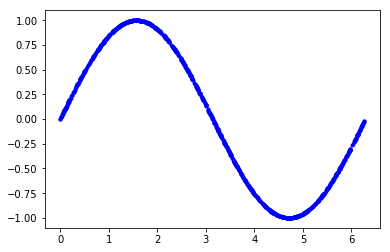

In [3]:
SAMPLES = 1000

# 生成0-2pi随机数 产生sin正弦震荡
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# 洗牌值，以确保它们没有顺序
np.random.shuffle(x_values)

# 计算正弦值
y_values = np.sin(x_values).astype(np.float32)

# plot出图像
plt.plot(x_values, y_values, 'b.')
plt.show()

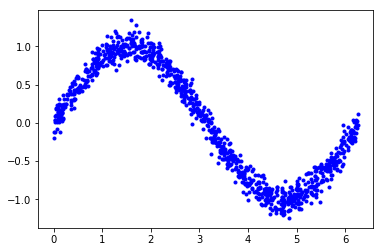

In [4]:
# 在每个y值上加一个小的随机数
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot data
plt.plot(x_values, y_values, 'b.')
plt.show()

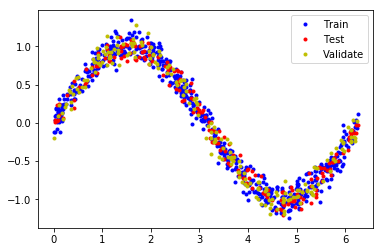

In [5]:
# 60%的数据用于训练，20%用于测试，剩下的20%验证
# 计算各部分指标
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split 将我们的数据分割成三部分
# 第二个 np.split 是 数据所在位置的索引数组
# split. 提供2个索引,数据被分为3部分--训练 验证 测试
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# 检查我们分割是否正确
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# 用不同的颜色绘制每个分区中的数据
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

In [6]:
# 使用Keras创建一个简单的模型体系结构
model_1 = tf.keras.Sequential()

# 第一层接收标量输入并通过8个神经元. 
# 神经元根据“relu”激活函数来决定是否激活
model_1.add(keras.layers.Dense(8,t activation='relu', input_shape=(1,)))

#  最后一层是单个神经元，因为我们想输出单个sin值
model_1.add(keras.layers.Dense(1))

# 使用标准的“adam”优化器和平均平方误差或“mse”损失函数进行回归编译模型
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [7]:
# 使用我们的训练数据训练模型，同时验证我们的验证集
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,validation_data=(x_validate, y_validate))

Epoch 1/500
10/10 [==============================] - 2s 113ms/step - loss: 0.7289 - mae: 0.7120 - val_loss: 0.6401 - val_mae: 0.6504
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6329 - mae: 0.6488 - val_loss: 0.5587 - val_mae: 0.6031
Epoch 3/500
10/10 [==============================] - 0s 10ms/step - loss: 0.5201 - mae: 0.5735 - val_loss: 0.5014 - val_mae: 0.5763
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 0.5057 - mae: 0.5760 - val_loss: 0.4632 - val_mae: 0.5615
Epoch 5/500
10/10 [==============================] - 0s 9ms/step - loss: 0.4502 - mae: 0.5459 - val_loss: 0.4386 - val_mae: 0.5536
Epoch 6/500
10/10 [==============================] - 0s 8ms/step - loss: 0.4168 - mae: 0.5332 - val_loss: 0.4227 - val_mae: 0.5490
Epoch 7/500
10/10 [==============================] - 0s 9ms/step - loss: 0.4211 - mae: 0.5341 - val_loss: 0.4125 - val_mae: 0.5464
Epoch 8/500
10/10 [==============================] - 0s 8ms/step - loss: 0.3988 

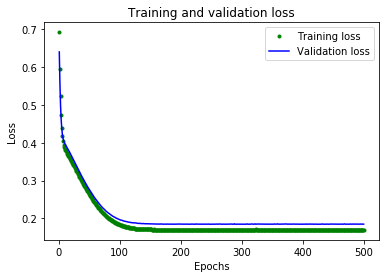

In [8]:
# 画一个在训练和验证时真实值和预测值的损失
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

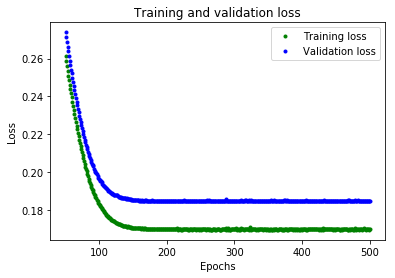

In [9]:
# 跳过前50个Epoch 让图表更容易被读
SKIP = 50

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

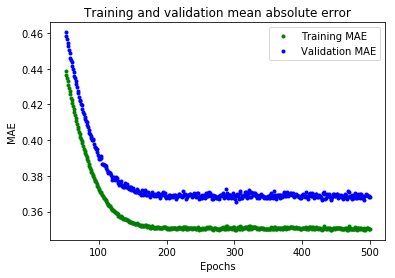

In [10]:
plt.clf() #清除所有轴 保留图表可以继续被使用

# 画一个平均绝对误差的图表，这是另一种方法测量 预测 中的误差量
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step - loss: 0.1627 - mae: 0.3434


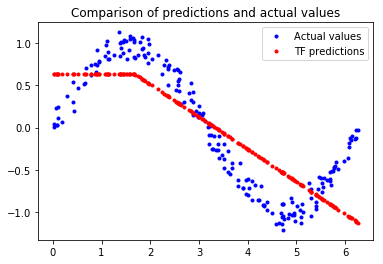

In [11]:
# 计算和打印出我们的测试集的损失
test_loss, test_mae = model_1.evaluate(x_test, y_test)

# 根据我们的测试数据集做出预测
y_test_pred = model_1.predict(x_test)

# 用图表把预测与实际值作对比
plt.clf()
plt.title('Comparison of predictions and actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

In [12]:
## 定义更大的一个model 训练

model = tf.keras.Sequential()

# 第一层采用标量输入，并通过16个“神经元”传递 神经元根据“relu”激活函数来决定是否激活。
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# 新的第二层和第三层将帮助网络学习更复杂的表示
model.add(keras.layers.Dense(16, activation='relu'))

# 最后一层是单个神经元，因为我们想输出单个值 即Sin值
model.add(keras.layers.Dense(1))

# 使用标准的“adam”优化器和平均平方误差或“mse”损失函数进行回归编译模型.
model.compile(optimizer='adam', loss="mse", metrics=["mae"])

In [13]:
# 训练模型
history = model.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

# Save the model to disk
model.save(MODEL_TF)

Epoch 1/500
10/10 [==============================] - 1s 23ms/step - loss: 0.4355 - mae: 0.5542 - val_loss: 0.4315 - val_mae: 0.5685
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4183 - mae: 0.5548 - val_loss: 0.4157 - val_mae: 0.5581
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3871 - mae: 0.5322 - val_loss: 0.3988 - val_mae: 0.5444
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.3954 - mae: 0.5348 - val_loss: 0.3834 - val_mae: 0.5350
Epoch 5/500
10/10 [==============================] - 0s 28ms/step - loss: 0.3670 - mae: 0.5163 - val_loss: 0.3684 - val_mae: 0.5257
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3426 - mae: 0.4999 - val_loss: 0.3532 - val_mae: 0.5166
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3453 - mae: 0.5006 - val_loss: 0.3369 - val_mae: 0.5055
Epoch 8/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3182 -

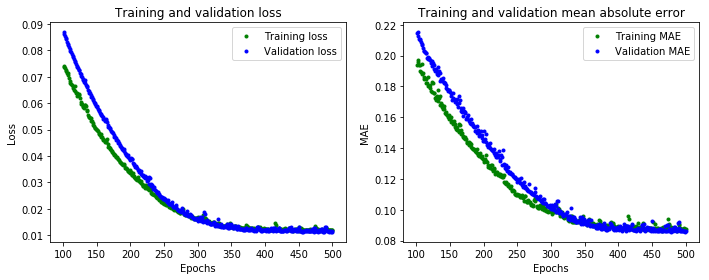

In [14]:
# 训练和验证期间的预测值和实际值
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# 跳过前100个Epoch 让图表更容易读取
SKIP = 100

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

# 画一个平均误差图表 来看误差
train_mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

7/7 [==============================] - 0s 2ms/step - loss: 0.0102 - mae: 0.0815


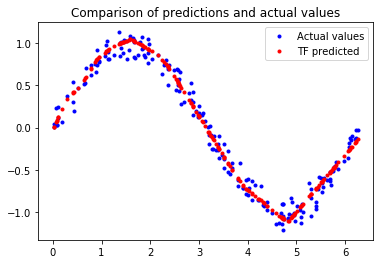

In [15]:
# 来检查其基于测试数据的预测 （之前早些测试了第一个模型的方法）
# 计算并打印出测试数据的损失，平均绝对误差
test_loss, test_mae = model.evaluate(x_test, y_test)

# 基于测试数据作出预测
y_test_pred = model.predict(x_test)

# 画出预测值和真实值 做比较
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predicted')
plt.legend()
plt.show()

In [16]:
# 模型转换

In [17]:
# 将模型转换成没有量化的TFL格式
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()

# 保存model
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

# 将模型转换量化的TFL格式
def representative_dataset():
  for i in range(500):
    yield([x_train[i].reshape(1, 1)])
# 设置优化标.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# 只执行整数量化
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# 提供一个有代表性的数据集，以确保我们的量化正确.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# 保存模型
open(MODEL_TFLITE, "wb").write(model_tflite)

2488

In [18]:
# 我们为TFLite模型定义了预测(用于预测)和评估(用于损失)函数。
# 注意:这些已经包含在TF模型中，但没有包含在TFLite模型中

def predict_tflite(tflite_model, x_test):
  # 准备测试数据
  x_test_ = x_test.copy()
  x_test_ = x_test_.reshape((x_test.size, 1))
  x_test_ = x_test_.astype(np.float32)

  # 初始化TFLite解释器
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # 如果需要，量化输入层(从浮点数到整数)
  input_scale, input_zero_point = input_details["quantization"]
  if (input_scale, input_zero_point) != (0.0, 0):
    x_test_ = x_test_ / input_scale + input_zero_point
    x_test_ = x_test_.astype(input_details["dtype"])
  
  # 调用解释器
  y_pred = np.empty(x_test_.size, dtype=output_details["dtype"])
  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i]])
    interpreter.invoke()
    y_pred[i] = interpreter.get_tensor(output_details["index"])[0]
  
  # 如果需要，对输出层进行反量化(从整数到浮点数)
  output_scale, output_zero_point = output_details["quantization"]
  if (output_scale, output_zero_point) != (0.0, 0):
    y_pred = y_pred.astype(np.float32)
    y_pred = (y_pred - output_zero_point) * output_scale

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

In [19]:
# 预测
# 计算预测值
y_test_pred_tf = model.predict(x_test)
y_test_pred_no_quant_tflite = predict_tflite(model_no_quant_tflite, x_test)
y_test_pred_tflite = predict_tflite(model_tflite, x_test)

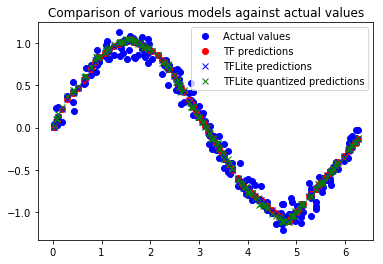

In [20]:
# 比较预测
plt.clf() 
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual values')
plt.plot(x_test, y_test_pred_tf, 'ro', label='TF predictions')
plt.plot(x_test, y_test_pred_no_quant_tflite, 'bx', label='TFLite predictions')
plt.plot(x_test, y_test_pred_tflite, 'gx', label='TFLite quantized predictions')
plt.legend()
plt.show()

In [21]:
# 损失(MSE/均方误差)

In [22]:
# 计算loss
loss_tf, _ = model.evaluate(x_test, y_test, verbose=0)
loss_no_quant_tflite = evaluate_tflite(model_no_quant_tflite, x_test, y_test)
loss_tflite = evaluate_tflite(model_tflite, x_test, y_test)

In [24]:
# 比较 loss
df = pd.DataFrame.from_records(
    [["TensorFlow", loss_tf],
     ["TensorFlow Lite", loss_no_quant_tflite],
     ["TensorFlow Lite Quantized", loss_tflite]],
     columns = ["Model", "Loss/MSE"], index="Model").round(4)
df

,Loss/MSE
Model,
TensorFlow,0.0102
TensorFlow Lite,0.0102
TensorFlow Lite Quantized,0.0109


In [25]:
# 计算模型大小
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_tflite = os.path.getsize(MODEL_TFLITE)

In [26]:
# 比较模型大小
pd.DataFrame.from_records(
    [["TensorFlow", f"{size_tf} bytes", ""],
     ["TensorFlow Lite", f"{size_no_quant_tflite} bytes ", f"(reduced by {size_tf - size_no_quant_tflite} bytes)"],
     ["TensorFlow Lite Quantized", f"{size_tflite} bytes", f"(reduced by {size_no_quant_tflite - size_tflite} bytes)"]],
     columns = ["Model", "Size", ""], index="Model")

,Size,
Model,,
TensorFlow,4096 bytes,
TensorFlow Lite,2788 bytes,(reduced by 1308 bytes)
TensorFlow Lite Quantized,2488 bytes,(reduced by 300 bytes)


In [27]:
## Generate a TensorFlow Lite for Microcontrollers Model ##

In [6]:
# 如果xxd不可用，则安装它
#!apt-get update && apt-get -qq install xxd
# 转换为C源文件
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
# 更新变量名
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

In [8]:
cat {MODEL_TFLITE_MICRO}

unsigned char g_model[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x98, 0x00, 0x00, 0x00, 0xc8, 0x00, 0x00, 0x00, 0x1c, 0x03, 0x00, 0x00,
  0x2c, 0x03, 0x00, 0x00, 0x30, 0x09, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x60, 0xf7, 0xff, 0xff,
  0x10, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x28, 0x00, 0x00, 0x00,
  0x44, 0x00, 0x00, 0x00, 0x05, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x65, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0xbc, 0xff, 0xff, 0xff,
  0x09, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00,
  0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x34, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x